In [1]:
## Initial imports and dependencies
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Upload Dataset
path ='Mtns.csv'
mtns_df = pd.read_csv(path)
mtns_df.head(10)

,date,name,nationality,cause_of_death,mountain
0,8/24/1985,Ragobir Thapa Ghurka,Nepal,Avalanche,nanga_parbat
1,8/24/1985,Albert F. Mummery,United Kingdom,Avalanche,nanga_parbat
2,8/24/1985,Goman Singh Ghurka,Nepal,Avalanche,nanga_parbat
3,6/7/1922,Dorje,Nepal,Avalanche,everest
4,6/7/1922,Temba,Nepal,Avalanche,everest
5,6/7/1922,Sange,Nepal,Avalanche,everest
6,6/7/1922,Pema,Nepal,Avalanche,everest
7,6/7/1922,Pasang,Nepal,Avalanche,everest
8,6/7/1922,Norbu,Nepal,Avalanche,everest
9,6/7/1922,Lhakpa,Nepal,Avalanche,everest


In [4]:
#view data size
mtns_df.shape

(973, 5)

In [6]:
mtns_df.count()


date              973
name              973
nationality       973
cause_of_death    973
mountain          973
dtype: int64

In [7]:
mtns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            973 non-null    object
 1   name            973 non-null    object
 2   nationality     973 non-null    object
 3   cause_of_death  973 non-null    object
 4   mountain        973 non-null    object
dtypes: object(5)
memory usage: 38.1+ KB


In [50]:
mtns_df.astype(str)

,date,name,nationality,cause_of_death,mountain
0,8/24/1985,Ragobir Thapa Ghurka,Nepal,Avalanche,nanga_parbat
1,8/24/1985,Albert F. Mummery,United Kingdom,Avalanche,nanga_parbat
2,8/24/1985,Goman Singh Ghurka,Nepal,Avalanche,nanga_parbat
3,6/7/1922,Dorje,Nepal,Avalanche,everest
4,6/7/1922,Temba,Nepal,Avalanche,everest
...,...,...,...,...,...
968,5/18/2021,Pemba Tashi Sherpa,Nepal,Fall into a crevasse,everest
969,5/23/2021,Wong Dorchi Sherpa,Nepal,Fall into a crevasse,everest
970,7/19/2021,Kim Hong-bin,South Korea,Fall,broad_peak
971,7/25/2021,Rick Allen,United Kingdom,Avalanche,k2


In [53]:
mtns_df.apply(str)

date              0      8/24/1985\n1      8/24/1985\n2      8/2...
name              0      Ragobir Thapa Ghurka\n1         Albert ...
nationality       0               Nepal\n1      United Kingdom\n...
cause_of_death    0                 Avalanche\n1                ...
mountain          0      nanga_parbat\n1      nanga_parbat\n2   ...
dtype: object

In [54]:
mtns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            973 non-null    string
 1   name            973 non-null    string
 2   nationality     973 non-null    string
 3   cause_of_death  973 non-null    string
 4   mountain        973 non-null    string
dtypes: string(5)
memory usage: 38.1 KB


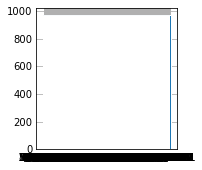

<Figure size 7200x7200 with 0 Axes>

In [21]:
#trying bar graph
plt.style.use('_mpl-gallery')

# make data:
#np.random.seed(3)
x = mtns_df.date
y = mtns_df.nationality.count()

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=10, edgecolor="white", linewidth=1)

#ax.set(xlim=(0, 14), xticks=np.arange(1, 200),
#       ylim=(0, 14), yticks=np.arange(1, 200))

plt.figure(figsize=(100, 100))

plt.show()

ValueError: could not convert string to float: 'nanga_parbat'

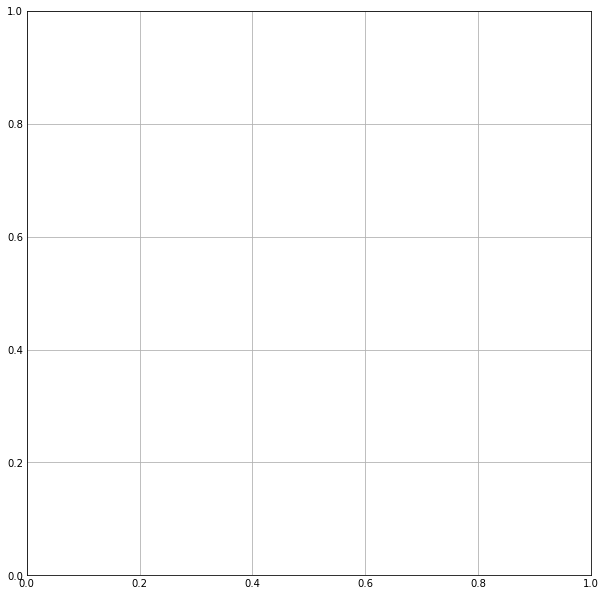

In [26]:
#trying pie chart
y_axis = mtns_df.mountain
x_axis = mtns_df.date
colors = ["slateblue", "magenta", "lightblue", "green", "yellowgreen", "greenyellow", "yellow", "orange", "gold", "indianred", "tomato", "mistyrose"]
explode_values = (0, 0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0)
plt.subplots(figsize=(8, 8))
plt.pie(y_axis,
    explode=explode_values,
    colors=colors,
    labels=x_axis,
    autopct='%.1f%%')

plt.show()